In [163]:
import pandas as pd
import numpy as np

In [164]:
import matplotlib.pyplot as plt

In [165]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering

# Import Data

In [166]:
f1   = pd.read_excel('/Users/ilyasozgur/Desktop/OutputforProject/Result.xlsx') 
df_1 = pd.read_excel('/Users/ilyasozgur/Desktop/OutputforProject/Result.xlsx') 

df_1 = df_1.iloc[:,1:11]

# Data Cleaning

In [167]:
df_2 = df_1.iloc[:,0:11]
df_2['Coast Length'] = df_2['Coast Length'].astype(float)
df_2['Inc. Sea Level'] = df_2['Inc. Sea Level'].astype(float)
df_2['Average Elevation'] = df_2['Average Elevation'].astype(float)

country = df_2['Country']
df_2 = df_2.drop(['Country'], axis=1)

df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp Increase      25 non-null     float64
 1   Precip Increase    25 non-null     float64
 2   Max Temp Anomaly   25 non-null     float64
 3   Max RainFall       25 non-null     float64
 4   Max Drought        25 non-null     float64
 5   Heat Wave          25 non-null     float64
 6   Coast Length       25 non-null     float64
 7   Inc. Sea Level     25 non-null     float64
 8   Average Elevation  25 non-null     float64
dtypes: float64(9)
memory usage: 1.9 KB


,Temp Increase,Precip Increase,Max Temp Anomaly,Max RainFall,Max Drought,Heat Wave,Coast Length,Inc. Sea Level,Average Elevation
0,2.57,-5.32,0.89,-0.35,0.08,0.00,7314.0,68.0,34.0
1,2.00,1.27,1.21,0.36,-0.03,0.01,3218.0,80.0,320.0
2,2.18,-1.16,1.92,-0.78,-0.14,0.01,3794.0,80.0,61.0
3,1.27,1.37,0.40,0.59,0.04,0.02,6268.0,39.0,331.0
4,2.02,5.44,0.50,-0.75,-0.05,0.01,648.0,100.0,91.0


# Scaling Data

In [168]:
scaler = StandardScaler()
df_3 = scaler.fit_transform(df_2)
df_3 = pd.DataFrame({'Temp Increase'    : df_3[:, 0] , 'Precip Increase': df_3[:, 1],
                     'Max Temp Anomaly' : df_3[:, 2] , 'Max RainFall'   : df_3[:, 3],
                     'Max Drought'      : df_3[:, 4] , 'Heat Wave'      : df_3[:, 5],
                     'Coast Length'     : df_3[:, 6] , 'Inc. Sea Level' : df_3[:, 7],
                     'Average Elevation': df_3[:, 8]})

df_3.info()
df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp Increase      25 non-null     float64
 1   Precip Increase    25 non-null     float64
 2   Max Temp Anomaly   25 non-null     float64
 3   Max RainFall       25 non-null     float64
 4   Max Drought        25 non-null     float64
 5   Heat Wave          25 non-null     float64
 6   Coast Length       25 non-null     float64
 7   Inc. Sea Level     25 non-null     float64
 8   Average Elevation  25 non-null     float64
dtypes: float64(9)
memory usage: 1.9 KB


,Temp Increase,Precip Increase,Max Temp Anomaly,Max RainFall,Max Drought,Heat Wave,Coast Length,Inc. Sea Level,Average Elevation
0,1.539890,-1.713464,0.665901,-0.493749,1.315587,-0.639602,1.666910,0.749582,-1.241405
1,0.862833,-0.169359,1.185121,0.336966,-0.292353,0.426401,0.358548,1.167177,0.123720
2,1.076640,-0.738733,2.337142,-0.996857,-1.900292,0.426401,0.542536,1.167177,-1.112530
3,-0.004276,-0.145928,-0.129156,0.606071,0.730882,1.492405,1.332792,-0.259605,0.176225
4,0.886589,0.807714,0.033100,-0.961757,-0.584705,0.426401,-0.462373,1.863167,-0.969335


## K-means Clustering 

## Finding optimal no of cluster

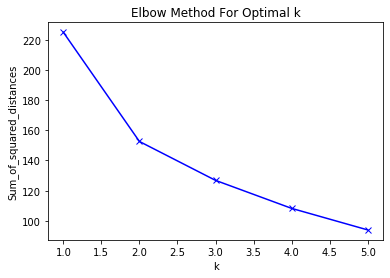

In [169]:
sum_of_squared_distances = []
K = range(1,6)

for k in K:
    km = KMeans(n_clusters=k, init='k-means++',random_state=5)
    km = km.fit(df_3)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Creating Model

In [170]:
model1 = KMeans(n_clusters=2, random_state=10)

model1.fit_predict(df_3)
labels1 = model1.labels_
print(labels1)

[1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1]


# Evaluating Clusters

In [171]:
df_m1 = pd.DataFrame({'cluster_labels': labels1, 'Country':country})
df_m1 = pd.merge(df_m1, df_1, on=['Country'], how='left')

In [172]:
df_m1_1 = df_m1[df_m1['cluster_labels'] == 1].reset_index(drop=True)
df_m1_1

,cluster_labels,Country,Temp Increase,Precip Increase,Max Temp Anomaly,Max RainFall,Max Drought,Heat Wave,Coast Length,Inc. Sea Level,Average Elevation
0,1,Denmark,2.57,-5.32,0.89,-0.35,0.08,0.00,7314,68.0,34
1,1,Sweden,2.00,1.27,1.21,0.36,-0.03,0.01,3218,80.0,320
2,1,Estonia,2.18,-1.16,1.92,-0.78,-0.14,0.01,3794,80.0,61
3,1,Cyprus,2.02,5.44,0.50,-0.75,-0.05,0.01,648,100.0,91
4,1,Finland,2.46,1.26,1.48,0.06,-0.14,0.01,1250,50.0,164
5,1,Latvia,1.87,0.00,1.47,-0.54,-0.07,0.01,498,70.0,87
6,1,Lithuania,1.91,0.42,1.34,-0.46,-0.05,0.01,90,40.0,110
7,1,Poland,2.04,-2.33,0.94,-0.68,-0.09,0.01,440,50.0,173
8,1,Netherlands,1.96,-5.22,0.30,-0.95,0.01,0.00,451,50.0,30
9,1,Hungary,1.32,-1.00,0.65,-0.78,-0.07,0.01,0,0.0,143


# Mini Batch K means Clustering 

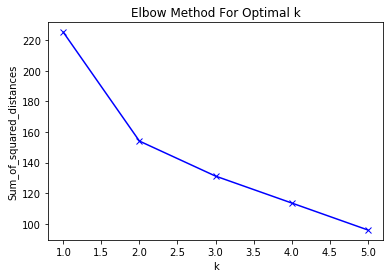

In [173]:
sum_of_squared_distances = []
K = range(1,6)

for k in K:
    km = MiniBatchKMeans(n_clusters=k, init='k-means++',random_state=5)
    km = km.fit(df_3)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [174]:
model2 = MiniBatchKMeans(n_clusters=2, random_state=10)

model2.fit_predict(df_3)
labels2 = model2.labels_

print(labels2)

[0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0]


In [175]:
df_m2 = pd.DataFrame({'cluster_labels': labels2, 'Country':country})
df_m2 = pd.merge(df_m2, df_1, on=['Country'], how='left')

In [176]:
df_m1_2 = df_m2[df_m2['cluster_labels'] == 1].reset_index(drop=True)
df_m1_2

,cluster_labels,Country,Temp Increase,Precip Increase,Max Temp Anomaly,Max RainFall,Max Drought,Heat Wave,Coast Length,Inc. Sea Level,Average Elevation
0,1,Croatia,1.27,1.37,0.40,0.59,0.04,0.02,6268,39.0,331
1,1,Greece,0.70,4.56,0.11,1.86,-0.01,0.02,13676,50.0,498
2,1,Germany,1.22,4.21,0.34,0.22,0.08,0.00,2389,49.0,263
3,1,Slovenia,1.23,1.33,0.12,0.18,0.11,0.02,47,50.0,492
4,1,Bulgaria,0.59,6.27,0.18,1.20,-0.02,0.02,354,47.0,470
5,1,Spain,-0.22,8.50,-0.36,1.73,0.07,0.00,4964,60.0,660
6,1,Portugal,-0.79,12.28,-0.47,1.81,0.05,-0.01,1793,60.0,372
7,1,Ireland,1.38,0.38,-0.09,0.06,0.01,0.00,1448,40.0,118
8,1,Malta,0.17,-0.61,0.25,0.83,-0.06,0.00,253,100.0,253
9,1,France,0.23,6.41,-0.17,0.37,0.02,-0.01,3427,30.0,375


# Hiearchial - Agglomerative Clustering - Manhattan Average

In [177]:
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage = 'average')
model3 = ac.fit_predict(df_3)
labels3 = model3

print(labels3)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [178]:
df_m3 = pd.DataFrame({'cluster_labels': labels3, 'Country':country})
df_m3 = pd.merge(df_m3, df_1, on=['Country'], how='left')

In [179]:
df_m3_1 = df_m3[df_m3['cluster_labels'] == 1].reset_index(drop=True)
df_m3_1

,cluster_labels,Country,Temp Increase,Precip Increase,Max Temp Anomaly,Max RainFall,Max Drought,Heat Wave,Coast Length,Inc. Sea Level,Average Elevation
0,1,Spain,-0.22,8.50,-0.36,1.73,0.07,0.00,4964,60.0,660
1,1,Portugal,-0.79,12.28,-0.47,1.81,0.05,-0.01,1793,60.0,372


# Hiearchial - Agglomerative Clustering - Manhattan Complete

In [180]:
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage = 'complete')
model4 = ac.fit_predict(df_3)
labels4 = model4

print(labels4)

[0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0]


In [181]:
df_m4 = pd.DataFrame({'cluster_labels': labels4, 'Country':country})
df_m4 = pd.merge(df_m4, df_1, on=['Country'], how='left')

In [182]:
df_m4_1 = df_m4[df_m4['cluster_labels'] == 1].reset_index(drop=True)
df_m4_1

,cluster_labels,Country,Temp Increase,Precip Increase,Max Temp Anomaly,Max RainFall,Max Drought,Heat Wave,Coast Length,Inc. Sea Level,Average Elevation
0,1,Croatia,1.27,1.37,0.40,0.59,0.04,0.02,6268,39.0,331
1,1,Greece,0.70,4.56,0.11,1.86,-0.01,0.02,13676,50.0,498
2,1,Slovenia,1.23,1.33,0.12,0.18,0.11,0.02,47,50.0,492
3,1,Bulgaria,0.59,6.27,0.18,1.20,-0.02,0.02,354,47.0,470
4,1,Spain,-0.22,8.50,-0.36,1.73,0.07,0.00,4964,60.0,660
5,1,Portugal,-0.79,12.28,-0.47,1.81,0.05,-0.01,1793,60.0,372
6,1,Malta,0.17,-0.61,0.25,0.83,-0.06,0.00,253,100.0,253


# Hiearchial - Agglomerative Clustering - Manhattan Complete

In [183]:
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'Cosine', linkage = 'complete')
model5 = ac.fit_predict(df_3)
labels5 = model5

print(labels5)

[0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0]


In [184]:
df_m5 = pd.DataFrame({'cluster_labels': labels5, 'Country':country})
df_m5 = pd.merge(df_m5, df_1, on=['Country'], how='left')

In [185]:
df_m5_1 = df_m5[df_m5['cluster_labels'] == 1].reset_index(drop=True)
df_m5_1

,cluster_labels,Country,Temp Increase,Precip Increase,Max Temp Anomaly,Max RainFall,Max Drought,Heat Wave,Coast Length,Inc. Sea Level,Average Elevation
0,1,Croatia,1.27,1.37,0.40,0.59,0.04,0.02,6268,39.0,331
1,1,Greece,0.70,4.56,0.11,1.86,-0.01,0.02,13676,50.0,498
2,1,Germany,1.22,4.21,0.34,0.22,0.08,0.00,2389,49.0,263
3,1,Slovenia,1.23,1.33,0.12,0.18,0.11,0.02,47,50.0,492
4,1,Bulgaria,0.59,6.27,0.18,1.20,-0.02,0.02,354,47.0,470
5,1,Spain,-0.22,8.50,-0.36,1.73,0.07,0.00,4964,60.0,660
6,1,Portugal,-0.79,12.28,-0.47,1.81,0.05,-0.01,1793,60.0,372
7,1,Malta,0.17,-0.61,0.25,0.83,-0.06,0.00,253,100.0,253
8,1,France,0.23,6.41,-0.17,0.37,0.02,-0.01,3427,30.0,375
9,1,Austria,0.28,4.44,0.07,0.04,0.08,0.01,0,0.0,910


In [186]:
df_m1 = df_m1[['Country','cluster_labels']]
df_m1.rename(columns={'cluster_labels':'Benefit/Loss'}, inplace=True)

In [187]:
df_m1['Benefit/Loss'] = df_m1['Benefit/Loss'].astype(str)
df_m1['Benefit/Loss'] = df_m1['Benefit/Loss'].apply(lambda x: x.replace('1', 'Loss'))
df_m1['Benefit/Loss'] = df_m1['Benefit/Loss'].apply(lambda x: x.replace('0', 'Benefit or Less Loss'))

In [188]:
f1 = f1.merge(df_m1, on='Country', how='left')

In [189]:
f1 = f1.iloc[:,1:25]

In [190]:
f1['Benefit/Loss'] = f1.apply(lambda x: 'Benefit or Less Loss' if x['Country'] == 'Hungry' else x['Benefit/Loss'], axis=1)
f1['Benefit/Loss'] = f1.apply(lambda x: 'Benefit or Less Loss' if x['Country'] == 'Slovakia' else x['Benefit/Loss'], axis=1)

In [191]:
f1.to_excel('/Users/ilyasozgur/Desktop/OutputforProject/MLResult.xlsx') 